<a href="https://colab.research.google.com/github/AndreyKuratov/project_mldm_21/blob/main/MLDM_augmentation_third_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Disk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Augmentation with image mixing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle

import csv
from pathlib import Path
from PIL import Image

import IPython.display as ipd

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from skimage.transform import resize

## Download Data

In [4]:
common_dir = '/content/drive/MyDrive/MLDM_proj/'
train_ids = np.load(common_dir + 'train_ids.npy', allow_pickle=True)

In [5]:
with open(common_dir + 'noises.pkl', 'rb') as f:
  noises = pickle.load(f)

with open(common_dir + 'tp_signals.pkl', 'rb') as f:
  tp_signals = pickle.load(f)

with open(common_dir + 'fp_signals.pkl', 'rb') as f:
  fp_signals = pickle.load(f)

with open(common_dir + 'tp_results.pkl', 'rb') as f:
  tp_results = pickle.load(f)

with open(common_dir + 'fp_results.pkl', 'rb') as f:
  fp_results = pickle.load(f)

## Prepare function

In [9]:
 # sample_lengths
tp_lengths = [x.shape[1] for x in tp_signals]
fp_lengths = [x.shape[1] for x in fp_signals]

In [66]:
print(min(tp_lengths), max(tp_lengths), np.mean(tp_lengths))
print(min(fp_lengths), max(fp_lengths), np.mean(fp_lengths))

3 69 22.770460959548448
3 69 23.499090672902053


In [12]:
min_length = 3
max_length = 40

In [37]:
def prepare_samples(tp_signal, tp_result, fp_signal, fp_result):
  result = []
  for x in tp_result:
    result.append([1, x[0], x[1]])

  for x in fp_result:
    result.append([0, x[0], x[1]])

  signals = [*tp_signal, *fp_signal]

  return signals, result

In [95]:
def prepare_result(part_results, classes=24):
  result = np.zeros(classes)
  part_results.sort()

  if part_results[0][0] == 0:
    result = 0.5*np.ones(classes)

  for x in part_results:
    result[x[1]] = x[0]

  return result

In [150]:
def prepare_image(signals, results, noises, max_point_number = 5, 
                  min_max_sizes = (3, 40), classes=24):
  max_length = 512
  
  point_number = np.random.randint(max_point_number) + 1
  chosen_ids = np.random.choice(len(signals), size=point_number, replace=False)

  parts = [signals[i] for i in chosen_ids]
  part_results = [results[i] for i in chosen_ids]
  part_results_final = prepare_result(part_results)


  whole_length = sum([x.shape[1] for x in parts])
  lengths = []

  while (whole_length < max_length):
    new_size = np.random.randint(min_max_sizes[0], min_max_sizes[1])
    new_size = new_size if (new_size + whole_length) <= 512 else (512 - whole_length)
    lengths.append(new_size)
    whole_length = whole_length + new_size
  
  sample_ids = np.random.choice(len(noises), size=len(lengths))
  for i, x in enumerate(sample_ids):
    start_point = np.random.randint(noises[x].shape[1] - lengths[i])
    parts.append(noises[x][:,start_point:start_point+lengths[i],:])

  ids = np.random.choice(len(parts), size=len(parts), replace=False)
  img = np.concatenate([parts[i] for i in ids], axis=1)

  return img, part_results_final

In [38]:
signals, results = prepare_samples(tp_signals, tp_results, fp_signals, fp_results)

In [151]:
img, part_results = prepare_image(signals, results, noises)

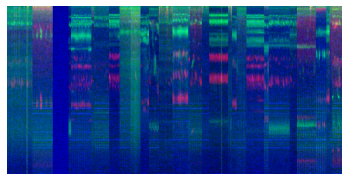

(256, 512, 3)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [149]:
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)
print(part_results)

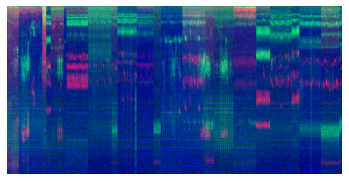

(256, 512, 3)
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5]


In [120]:
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)
print(part_results)

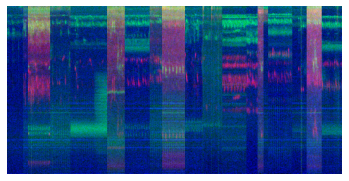

(256, 512, 3)
[0.5 0.5 0.5 0.5 0.  0.5 0.  0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.
 0.5 0.5 0.5 0.5 0.5 0.5]


In [124]:
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)
print(part_results)